In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Linear Regression

In this lab, we are going to use sklearn to implement linear regressors using different basis functions, and then add regularization to the models.

## Part 1 - Linear regression

* Generate 50 points in a line in the interval $[0, 10]$ for `x`, perturbed by a samll gaussian noise. For example, `y = 2 * x + 5 + noise` where `noise` is taken from a normal distribution.
* Use sklearn to fit A Linear Regression model, and predict the values `y_pred`
* plot the generated data as a scatter plot, and the prediction as a line
* plot the learnt parameters of the model. Couold it recover the intersect and the slope of the line?

*Note:* If you want to generate the same data as I generated, use $y = 3x + 5 + \epsilon$ after setting the random seed to 0

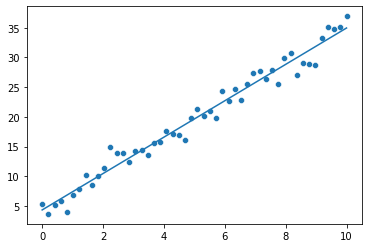

In [2]:
import scipy.stats
import numpy as numpy
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression

def generate_line_points(m,x,b):
    errors  = scipy.stats.norm.rvs(loc=0, scale=2, size=50)
    # print(errors)
    y = m*x+b+errors
    return y.reshape(50,1)

x = np.linspace(0,10, 50)
y = generate_line_points(3,x,5)
x=x.reshape(50,1)

ln = LinearRegression()
ln.fit(x, y)

sns.scatterplot(x=x.reshape(1,-1)[0], y=y.reshape(1,-1)[0])

sns.lineplot(x=x.reshape(1,-1)[0],y=ln.predict(x).reshape(1,-1)[0])
plt.show()


## Part 2 - Polynomial basis

* Generate a 2D dataset using a sine wave, perturbed by a small gaussian noise. 
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.
* Which degree of polynomial works better to model this scenario? 
* Plot the data and the prediction with the best degree
* print the coefficients and the intersect of the model

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

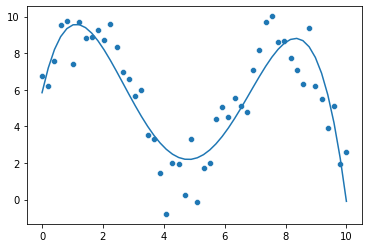

Coefficients:[ 0.          7.50852609 -4.55749137  0.78981196 -0.04150867]
Intercept:[5.84280837]


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def generate_line_points(m,x,b):
    errors  = scipy.stats.norm.rvs(loc=0, scale=1, size=50,random_state=0)
    y = m*np.sin(x)+b+errors
    return y.reshape(50,1)

#Definindo um espaço linear
x = np.linspace(0,10, 50)
#Definindo os valores de uma função com ruiudo gaussiano
y = generate_line_points(4,x,5)
x=x.reshape(-1,1)


#Definindo modelo uma função polinomial de base linear
grau = 4
poly_reg = make_pipeline(PolynomialFeatures(grau), LinearRegression())
poly_reg.fit(x, y)

#Cria uma matriz dos valores de x enquadrados a uma polinomial
# x = np.array([[1],[2],[3],[4],[5]])
# p = PolynomialFeatures(2)
# print(p.fit_transform(x))

# A função polyreg simplesmente cria um modelo polinomial de base linear
predicoes =poly_reg.predict(x).reshape(1,-1)

sns.scatterplot(x=x.reshape(1,-1)[0], y=y.reshape(1,-1)[0])

sns.lineplot(x=x.reshape(1,-1)[0],y=predicoes[0])
plt.show()

print(f"Coefficients:{poly_reg[1].coef_[0]}")
print(f"Intercept:{poly_reg[1].intercept_}")

In [4]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class generic_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, x):
        pass

    def fit(self, X):
        print("Executei aqui generic_transformer")
        return self
    
    def transform(self, X):
        print('executei o trasnform generic_transformer')
        return 'oi'

class generic(BaseEstimator, TransformerMixin):
    def __init__(self,x):
        pass

    def fit(self, X, y=None):
        print("Executei aqui generic")
        print(X)
        return self
    
    def transform(self, X):
        print('executei o transform generic')
        return 'oi'

# O make_pipeline executa uma série de modelos em cadeia
# quando o usamos o fit ele executa essa série de passos
#   Executa o fit da primeira função retorna a propria classe self
#   Em seguida ele executa o método transform do que foi retornado pelo fit. Nesse caso, ele executa o transform da própria classe e retorna os valores transformados.
#   Em seguida, é executado o fit da próxima classe do pipeline
#   E o processo segue nesse padrão para as demais classes
a = make_pipeline(generic_transformer(1), generic(1))



## Part 3 - Gaussian Basis

* Create a new sklearn transformer that receives one-dimensional data and returns gaussian features based on the gaussian basis: 
$$\phi_j = \exp{\left\{-\frac{(x - \mu_j)^2}{2s^2}\right\}}$$
* The transformer should receive an argument `N` that determines the number of centers $\mu_j$ that will be used, and an argument `s` that determines the scale. As an example, if `N=10` and `s=2`, 10 equally spaced "gaussians" with space 2 will be used in the range of the input variable.
* This is not a trivial task. In a nutshell, you should be creating a new `class` that inherits `BaseEstimator` and `TransformerMixin`, and that implements both `fit` and `transform`. If you feel stuck, I recommend reading the following [documentation](https://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers) and [guide](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-ef792bbb3260)

* Use your Gaussian Transformer and a Linear Regression model to fit the data you generated for Part 2
* Plot the data and the predictions
* Plot the coefficients and the intersect of the linear regression model
* Using a `N=30` and `s=2.0` I get a rather overfitted model, which parameter would you choose? why?

Executou o fit
Executou o transform
Executou o transform


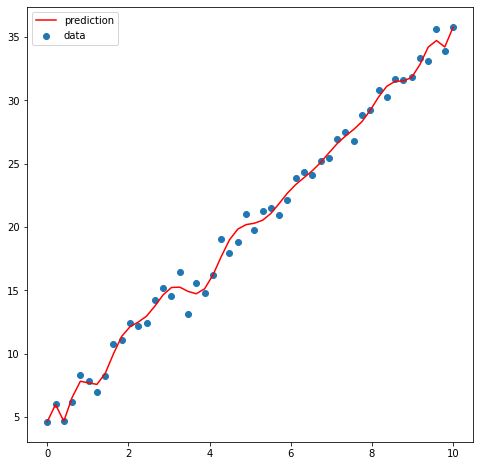

coefficients: [ 5.68207496e+10 -9.97655428e+10 -8.83913007e+11  4.17764135e+12
 -7.26237785e+12  3.89266400e+12  4.90135324e+12 -6.64385312e+12
 -2.89953340e+12  7.55490511e+12  2.09069207e+12 -8.08158904e+12
 -1.95716406e+12  8.36018094e+12  2.43971504e+12 -8.83805822e+12
 -2.85887230e+12  9.20975417e+12  3.27509108e+12 -9.92204269e+12
 -3.09498750e+12  1.11563748e+13  1.45330705e+12 -1.29408060e+13
  3.89959561e+12  1.27455093e+13 -1.73860466e+13  1.05430290e+13
 -3.34239563e+12  4.54910281e+11]
intercept: -34364090.98173535


In [5]:
# Nesta classe é criada uma série de vetores mu que eio que representam a média do modelo
# Cada vetor mu, é um vetor linearmente espaçado entre o valor mínimo e máximo do conjunto X
# A criação deste vetores é o único ajuste do modelo ao data set
# Após a criação destes vetores mu é feita a transformação dos dados para uma base linear
# Esta transformação linear é feita aplicandos os conjuntos a fórmula da distribuição normal.
x = np.linspace(0, 10, num=50)
y = 3 * x + 5 + np.random.normal(size=x.shape[0])
class GaussianBasis1D(BaseEstimator, TransformerMixin):
    def __init__(self, N, s):
        self.N = N
        self.s = s
    
    @staticmethod
    def _gaussian_basis(x, y, s):
        arg = ((x - y) / s) ** 2
        return np.exp(-0.5 * arg)
    
    def fit(self, X, y=None):
        print("Executou o fit")
        self.mu_ = np.linspace(X.min(), X.max(), self.N)
        return self
    
    def transform(self, X):
        print("Executou o transform")
        return self._gaussian_basis(X, self.mu_, self.s)

gaussian = make_pipeline(GaussianBasis1D(30,2), LinearRegression())
gaussian.fit(x[:, np.newaxis], y)
y_pred =gaussian.predict(x[:, np.newaxis])

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, label='data')
ax.plot(x, y_pred, color='r', label='prediction')
ax.legend()
plt.show()
plt.close('all')
print(f'coefficients: {gaussian["linearregression"].coef_}')
print(f'intercept: {gaussian["linearregression"].intercept_}')

## Part 4 - L2 Regularization

* Use the transformers from Part 2 and Part 3 with L2 regularized Linear Regression models from sklearn (Ridge Regression)
* Plot the data, together with the prediction curves from the 2 models

*Note:* If you generated the same data as I did, and want to get the same picture, use the following parameters:

* Degree of the polynomial = 4
* Gaussian Basis with `N=30` and `s=2` (Notice how these are the same values I used in Part 3, but the model is NOT overfitted anymore)
* regularization $\alpha$ = 0.5 

Executou o fit
Executou o transform
Executou o transform


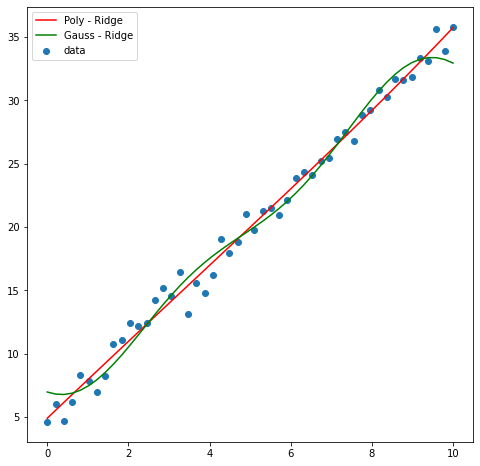

In [21]:
#Importando LinearRegression com regularization
from sklearn.linear_model import Ridge

#Fazendo a mesma predição feita anteriormente mas com regularização
l2_poly = make_pipeline(PolynomialFeatures(degree=4),Ridge(alpha=0.5))


# O alpha do Ridge define o peso da regularização
l2_poly.fit(x.reshape(-1,1), y.reshape(-1,1))
y_pred_poly = l2_poly.predict(x.reshape(-1,1))

# #Fazendo a mesma predição Gaussiana mas com regularização
l2_gauss = make_pipeline(GaussianBasis1D(30,2), Ridge(alpha=0.5))

l2_gauss.fit(x.reshape(-1,1) ,y.reshape(-1,1))
y_pred_gauss = l2_gauss.predict(x.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, label='data')
ax.plot(x, y_pred_poly, color='r', label='Poly - Ridge')
ax.plot(x, y_pred_gauss, color='green', label='Gauss - Ridge')
ax.legend()
plt.show()
plt.close('all')



## Part 5 - L1 Regularization

* Use the transformers from Part 2 and Part 3 with L1 regularized Linear Regression models from sklearn (Lasso)
* Plot the data, together with the prediction curves from the 2 models

*Note:* If you want to generate the same figure, use the same data and parameters as in the previous parts, and: 
* regularization $\alpha$ = 0.1
* `max_iter = 1e6` (To avoid the non-convergence warning)

Executou o fit
Executou o transform
Executou o transform


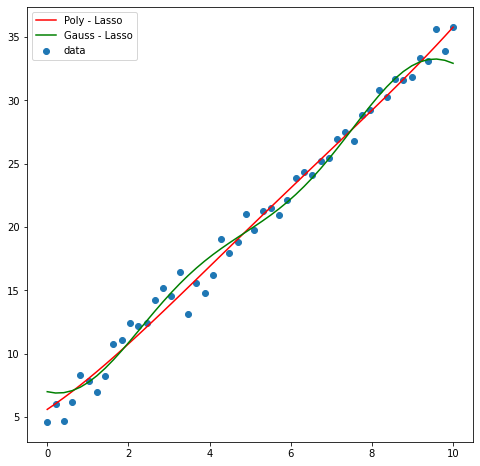

Executou o fit
Executou o transform
Executou o transform


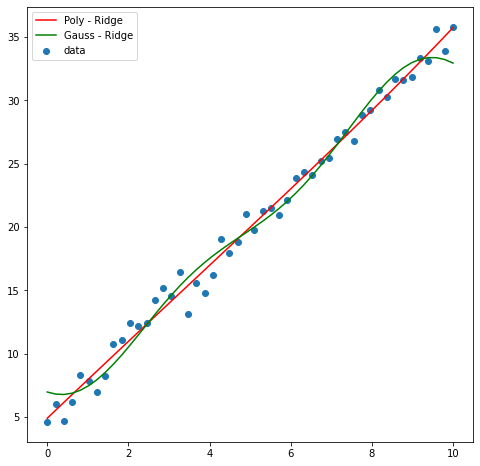

In [36]:
# Regressão Linear mas com Lasso como fator de regularizazação
# Esse fator usar a soma dos parâmetros como regularização
from sklearn.linear_model import Lasso
l1_poly = make_pipeline(PolynomialFeatures(degree=4), Lasso(alpha=0.1, max_iter=1e6))
l1_poly.fit(x.reshape(-1,1),y.reshape(-1,1))
y_pred_poly = l1_poly.predict(x.reshape(-1,1))

l1_gauss = make_pipeline(GaussianBasis1D(30,2), Lasso(alpha=0.1, max_iter=1e6))
l1_gauss.fit(x.reshape(-1,1),y.reshape(-1,1))
y_pred_gauss = l1_gauss.predict(x.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, label='data')
ax.plot(x, y_pred_poly, color='r', label='Poly - Lasso')
ax.plot(x, y_pred_gauss, color='green', label='Gauss - Lasso')
ax.legend()
plt.show()
plt.close('all')

from sklearn.linear_model import Ridge
l2_poly = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=0.5))
l2_poly.fit(x[:, np.newaxis].reshape(-1,1), y.reshape(-1,1))
y_pred_poly = l2_poly.predict(x[:, np.newaxis])

l2_gauss = make_pipeline(GaussianBasis1D(30, 2), Ridge(alpha=0.5))
l2_gauss.fit(x[:, np.newaxis].reshape(-1,1), y.reshape(-1,1))
y_pred_gauss = l2_gauss.predict(x[:, np.newaxis].reshape(-1,1))

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, label='data')
ax.plot(x, y_pred_poly, color='r', label='Poly - Ridge')
ax.plot(x, y_pred_gauss, color='green', label='Gauss - Ridge')
ax.legend()
plt.show()
plt.close('all')

## Part 6 - Elastic Net

* Use the transformers from Part 2 and Part 3 with L1 and L2 regularized Linear Regression models from sklearn (Elastic Net)
* Plot the data, together with the prediction curves from the 2 models

*Note:* If you want to generate the same figure, use the same data and parameters as in the previous parts, and: 
* regularization $\alpha$ = 0.1
* `max_iter = 1e6` (To avoid the non-convergence warning)

Executou o fit
Executou o transform
Executou o transform


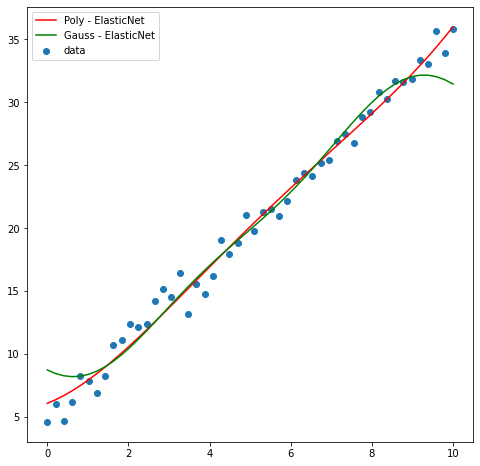

In [37]:
#Neste código é aplicada a mesma lógica dos demais
#Só que neste caso é usado o elastic net como fator de regularização da Regressão Linear
#O elastic net usa como fator de regularização do weight decay com o Lasso
from sklearn.linear_model import ElasticNet
elasticnet_poly = make_pipeline(PolynomialFeatures(degree=4), ElasticNet(alpha=0.1, max_iter=1e6))
elasticnet_poly.fit(x[:, np.newaxis], y)
y_pred_poly = elasticnet_poly.predict(x[:, np.newaxis])

elasticnet_gauss = make_pipeline(GaussianBasis1D(30, 2), ElasticNet(alpha=0.1, max_iter=1e6))
elasticnet_gauss.fit(x[:, np.newaxis], y)
y_pred_gauss = elasticnet_gauss.predict(x[:, np.newaxis])

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, label='data')
ax.plot(x, y_pred_poly, color='r', label='Poly - ElasticNet')
ax.plot(x, y_pred_gauss, color='green', label='Gauss - ElasticNet')
ax.legend()
plt.show()
plt.close('all')